In [1]:
import numpy as np
import glob
# Our image processing tools
import skimage.filters
import skimage.io
import skimage.measure
import skimage.morphology
import skimage.segmentation

# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', palette=colors, rc={'axes.labelsize': 16})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

//anaconda/envs/py36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


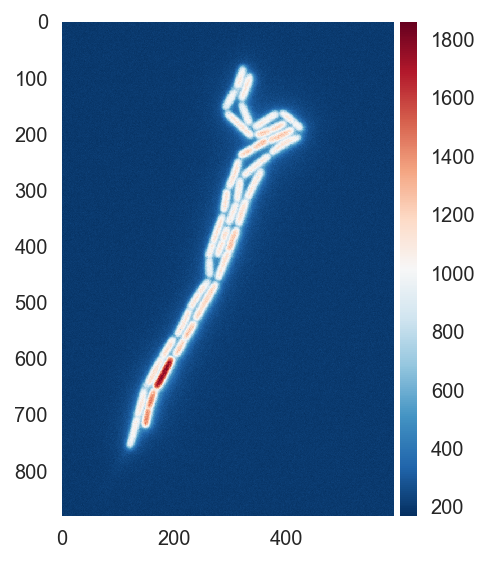

In [2]:
# load data from 'data/bacterial growth into a list

file_list = glob.glob('data/bacterial_growth/*.tif')
image_list = [skimage.io.imread(file) for file in file_list]
with sns.axes_style('dark'):
    _ = skimage.io.imshow(image_list[50], cmap = plt.cm.RdBu_r)


//anaconda/envs/py36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


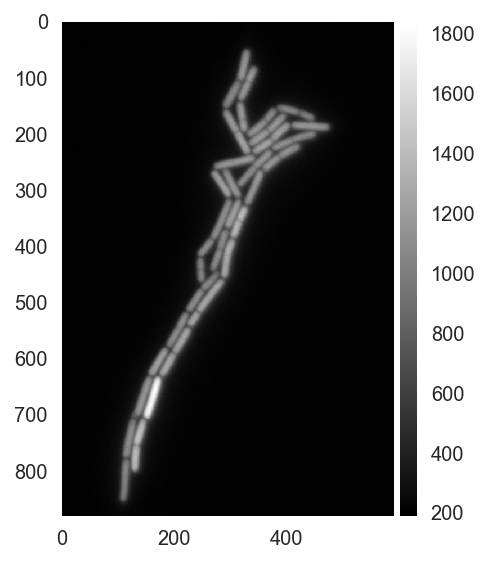

In [3]:
# median filtering
selem = skimage.morphology.square(3)
image_list_filt = []
for image in image_list:
    image_list_filt += [skimage.filters.median(image, selem)]
with sns.axes_style('dark'):
    _ = skimage.io.imshow(image_list_filt[54], cmap = plt.cm.gray)

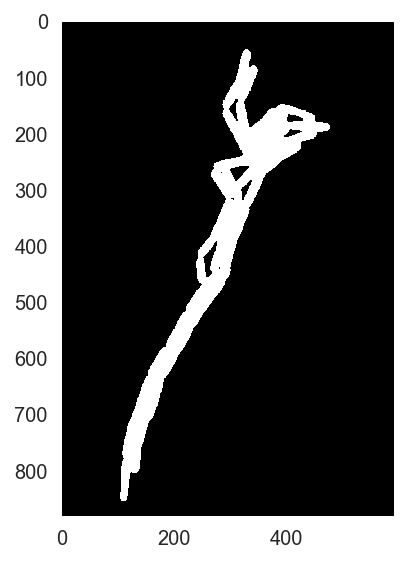

In [4]:
# otsu thersholding for each image
image_list_thresh = []
for image in image_list_filt:
    threshold = skimage.filters.threshold_otsu(image)
    image_list_thresh += [image > threshold]
with sns.axes_style('dark'):
    _ = skimage.io.imshow(image_list_thresh[54], cmap = plt.cm.gray)



In [5]:
# label bacteria (not really single..)
image_list_labels = []
for image in image_list_thresh:
    image_list_labels += [skimage.measure.label(image, background=0)]


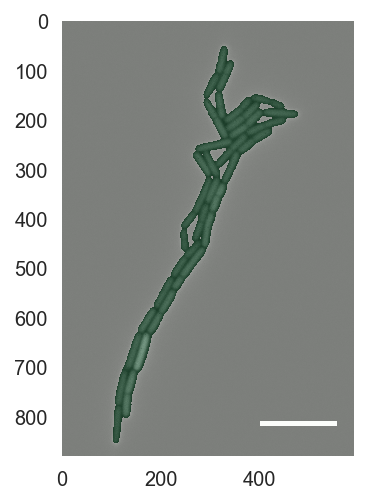

In [6]:
#image 55 with segmentation overlayed
interpixel_dist = 64.5 #nm
image_w_scale = np.array(image_list[54])
# will position scale on bottom right
scale10um = 10000 / interpixel_dist # ~155 "pixels"
image_w_scale[810:820, 400:400+int(scale10um)] = 2048
with sns.axes_style('dark'):
    _ = plt.imshow(image_w_scale, cmap = plt.cm.gray)
    _ = plt.imshow(image_list_thresh[54], cmap = plt.cm.Greens, alpha = 0.5)

In [7]:
# get props for all images
im_props = []
for image in image_list_labels:
    im_props += [skimage.measure.regionprops(image)]


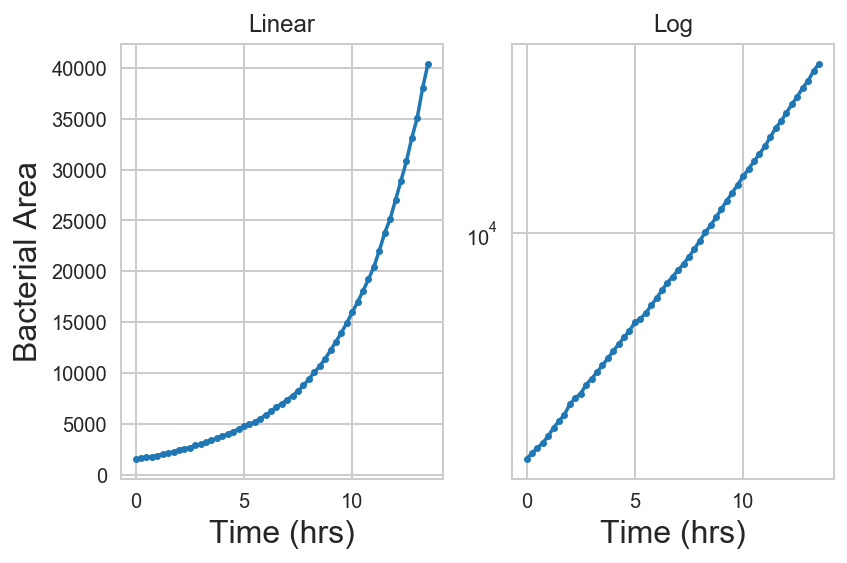

In [13]:
# get area for each image
area_list = []
for image in im_props:
    area_list += [image[0].area]
time_list = [(i*15)/60 for i in range(len(area_list))]
# plot area vs time (delta between images in 15 minutes)
fig, ax = plt.subplots(1,2)
with sns.axes_style('dark'):
    ax[1].set_yscale('log')
    ax[0].set_ylabel('Bacterial Area')
    ax[0].set_xlabel('Time (hrs)')
    ax[1].set_xlabel('Time (hrs)')
    ax[0].plot(time_list,area_list, marker='.')
    ax[1].plot(time_list,area_list, marker='.')
    ax[0].set_title('Linear')
    ax[1].set_title('Log')
#    fig.tight_layout(h_pad=3)

In [49]:
# polynmial fitting
z = np.polyfit(time_list, np.log10(area_list), 1)
# z[0] = 0.24058711 z[1] = 7.27916832
calc_area = np.empty(55)
times = np.asarray(time_list)
calc_area = 10 ** (z[0] * times +z[1])
calc_area[0] = 0

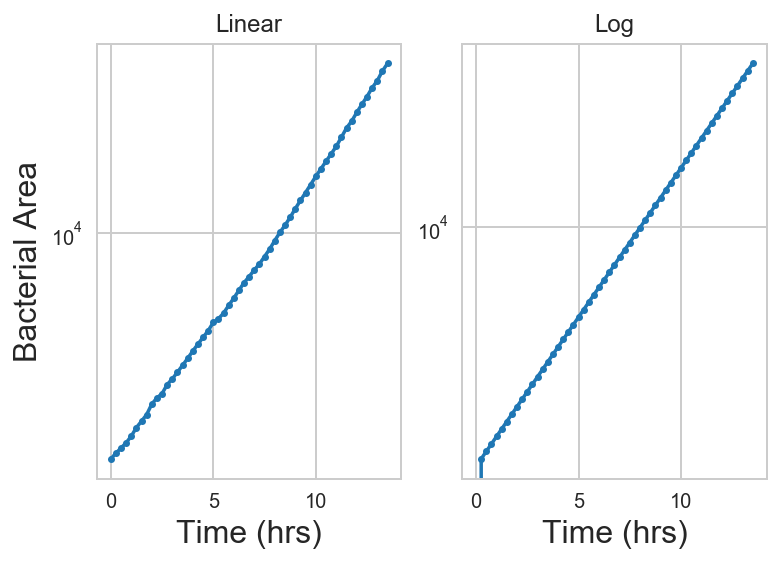

In [51]:
fig, ax = plt.subplots(1,2)
with sns.axes_style('dark'):
    ax[1].set_yscale('log')
    ax[0].set_yscale('log')
    ax[0].set_ylabel('Bacterial Area')
    ax[0].set_xlabel('Time (hrs)')
    ax[1].set_xlabel('Time (hrs)')
    ax[0].plot(time_list,area_list, marker='.')
    ax[1].plot(times,calc_area, marker='.')
    ax[0].set_title('Experimental')
    ax[1].set_title('Calculated')